In [51]:
import pandas as pd
import numpy as np

vix = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\VIX_datasets\vixcurrent.csv''', 
                  header=1, parse_dates=[0], index_col='Date')
vix.columns =['VIX_Open','VIX_High','VIX_Low','VIX_Close']

vix.head()

,VIX_Open,VIX_High,VIX_Low,VIX_Close
Date,,,,
2004-01-02,17.96,18.68,17.54,18.22
2004-01-05,18.45,18.49,17.44,17.49
2004-01-06,17.66,17.67,16.19,16.73
2004-01-07,16.72,16.75,15.50,15.50
2004-01-08,15.42,15.68,15.32,15.61


In [62]:
BTC_price = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\VIX_datasets\BCHARTS-MTGOXUSD.csv''', 
                  parse_dates=[0], index_col='Date')

BTC_price = BTC_price.sort_index() #sorted to match order of VIX data
BTC_price.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price
Date,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.990200,0.049510
2010-07-18,0.05941,0.08585,0.05941,0.08584,75.01,5.091994,0.067884
2010-07-19,0.09090,0.09307,0.07723,0.08080,574.00,49.661300,0.086518
2010-07-20,0.08181,0.08181,0.07426,0.07474,262.00,20.589520,0.078586
2010-07-21,0.07425,0.07921,0.06634,0.07921,575.00,42.262200,0.073499


In [63]:
#merge both datasets

df = pd.merge(BTC_price, vix, left_index=True, right_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 908 entries, 2010-07-19 to 2014-02-25
Data columns (total 11 columns):
Open                 908 non-null float64
High                 908 non-null float64
Low                  908 non-null float64
Close                908 non-null float64
Volume (BTC)         908 non-null float64
Volume (Currency)    908 non-null float64
Weighted Price       908 non-null float64
VIX_Open             908 non-null float64
VIX_High             908 non-null float64
VIX_Low              908 non-null float64
VIX_Close            908 non-null float64
dtypes: float64(11)
memory usage: 85.1 KB


In [64]:
#index the BTC market price and VIX close to 0

df['BTC_TR'] = df['Close']/df['Close'][0] #BTC_TR as Bitcoin Total Return
df['VIX_TR'] = df['VIX_Close']/df['VIX_Close'][0] #VIX_TR as VIX Total Return

In [66]:
df.head()

,Open,High,Low,Close,Volume (BTC),Volume (Currency),Weighted Price,VIX_Open,VIX_High,VIX_Low,VIX_Close,BTC_TR,VIX_TR
Date,,,,,,,,,,,,,
2010-07-19,0.09090,0.09307,0.07723,0.08080,574.0,49.661300,0.086518,27.02,27.30,25.12,25.97,1.000000,1.000000
2010-07-20,0.08181,0.08181,0.07426,0.07474,262.0,20.589520,0.078586,27.35,27.40,23.79,23.93,0.925000,0.921448
2010-07-21,0.07425,0.07921,0.06634,0.07921,575.0,42.262200,0.073499,23.61,26.63,23.59,25.64,0.980322,0.987293
2010-07-22,0.07921,0.08181,0.05050,0.05050,2160.0,129.784280,0.060085,24.37,24.85,23.72,24.63,0.625000,0.948402
2010-07-23,0.05050,0.06767,0.05050,0.06262,2402.5,141.065051,0.058716,24.79,25.17,23.32,23.47,0.775000,0.903735


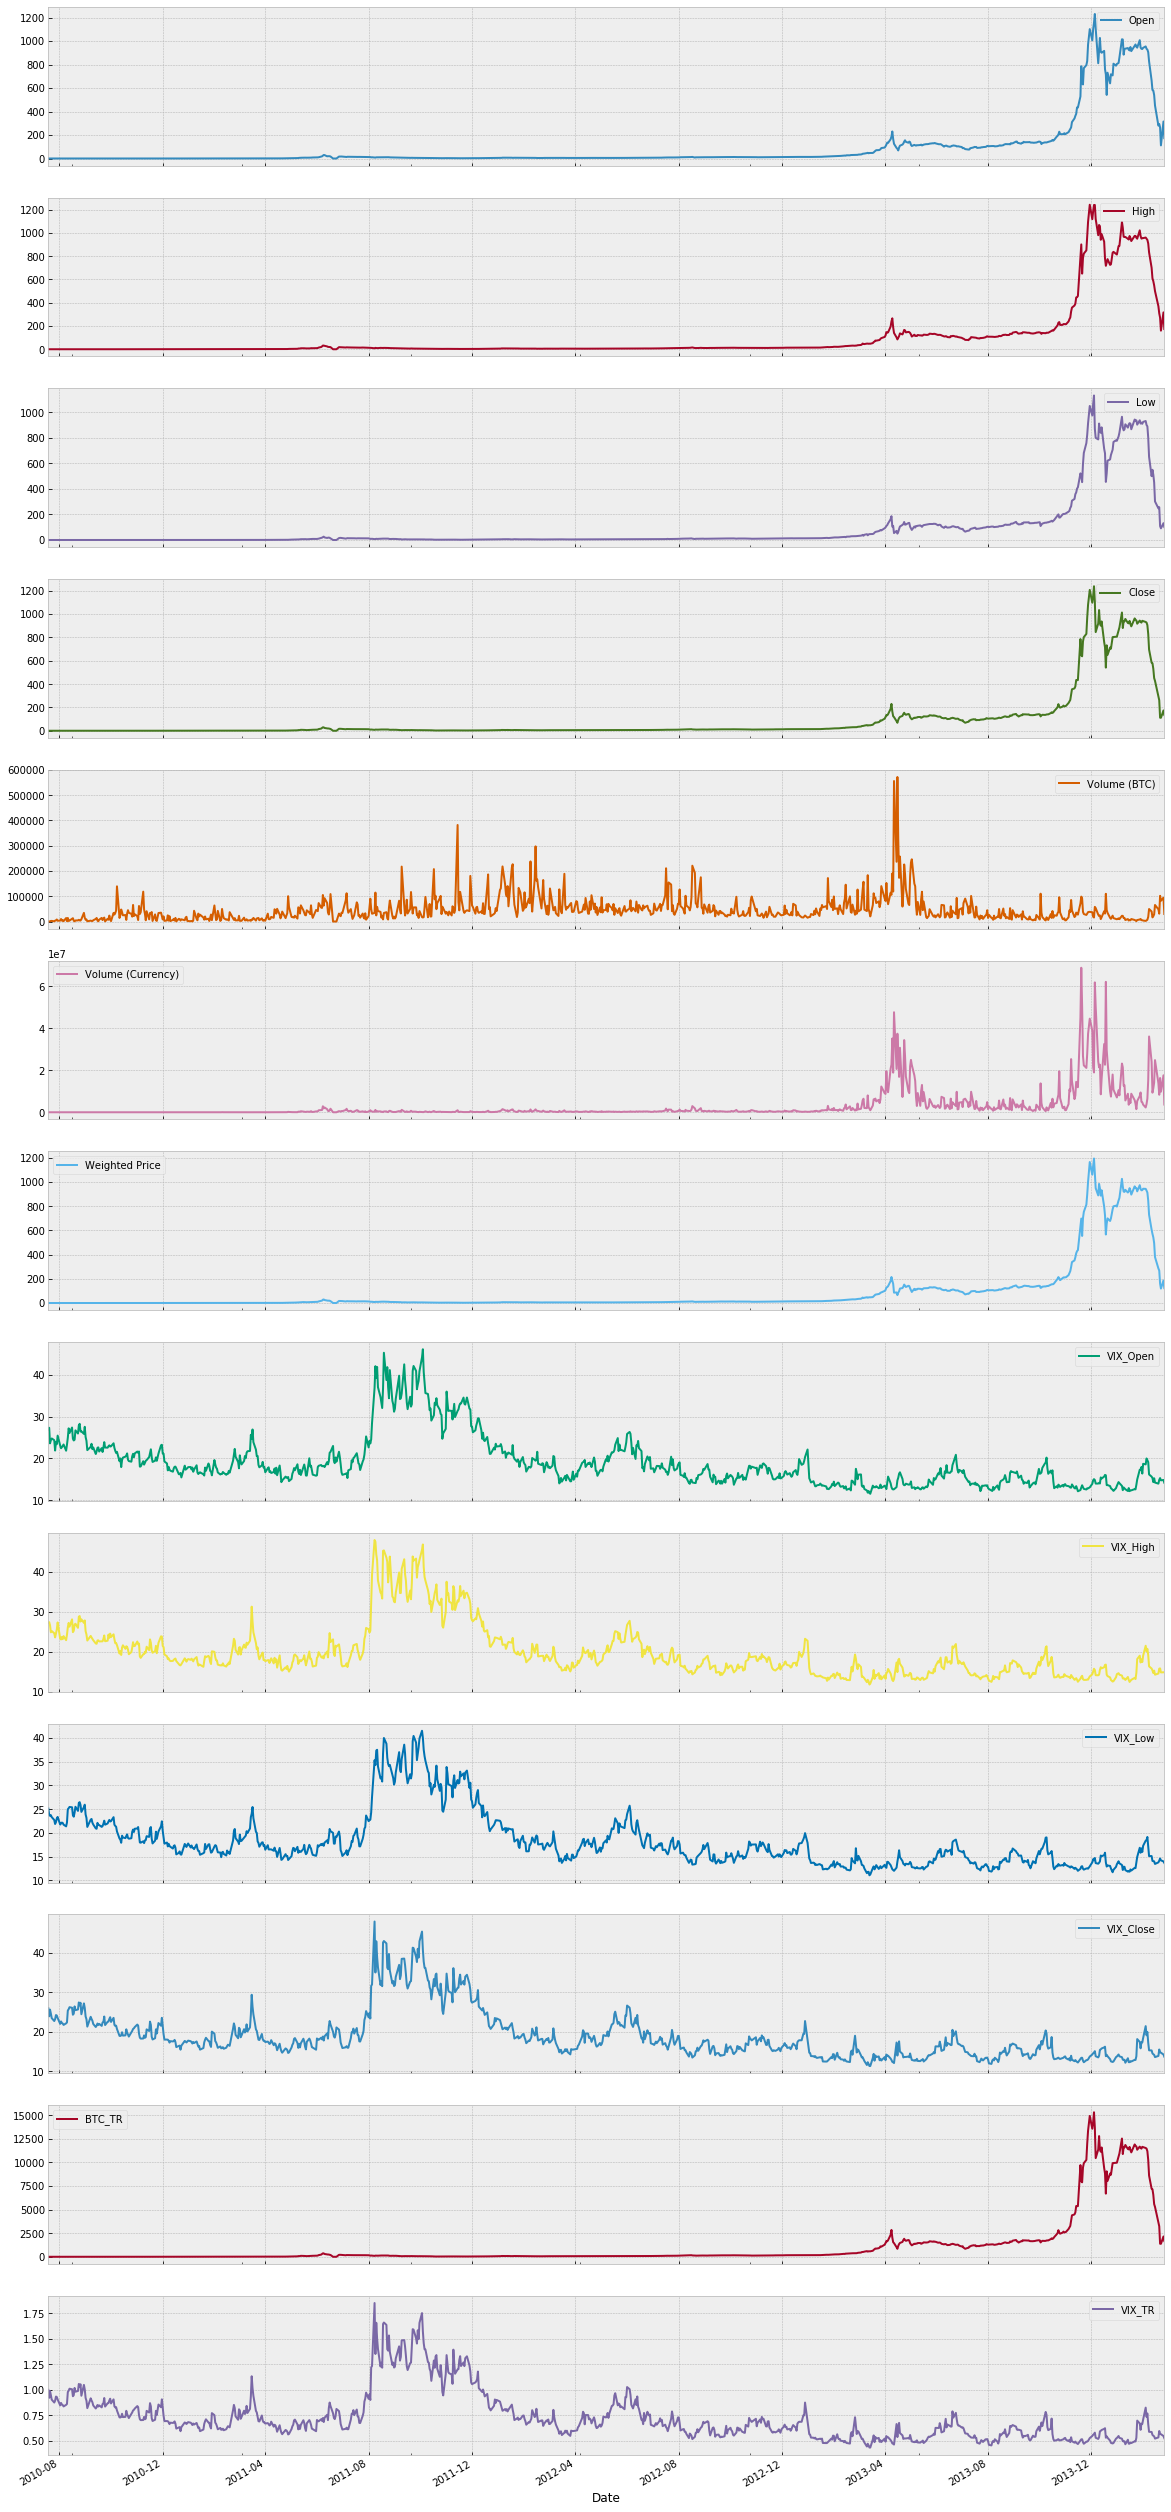

In [68]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

df.plot(subplots=True, figsize=(20,50))
plt.show()

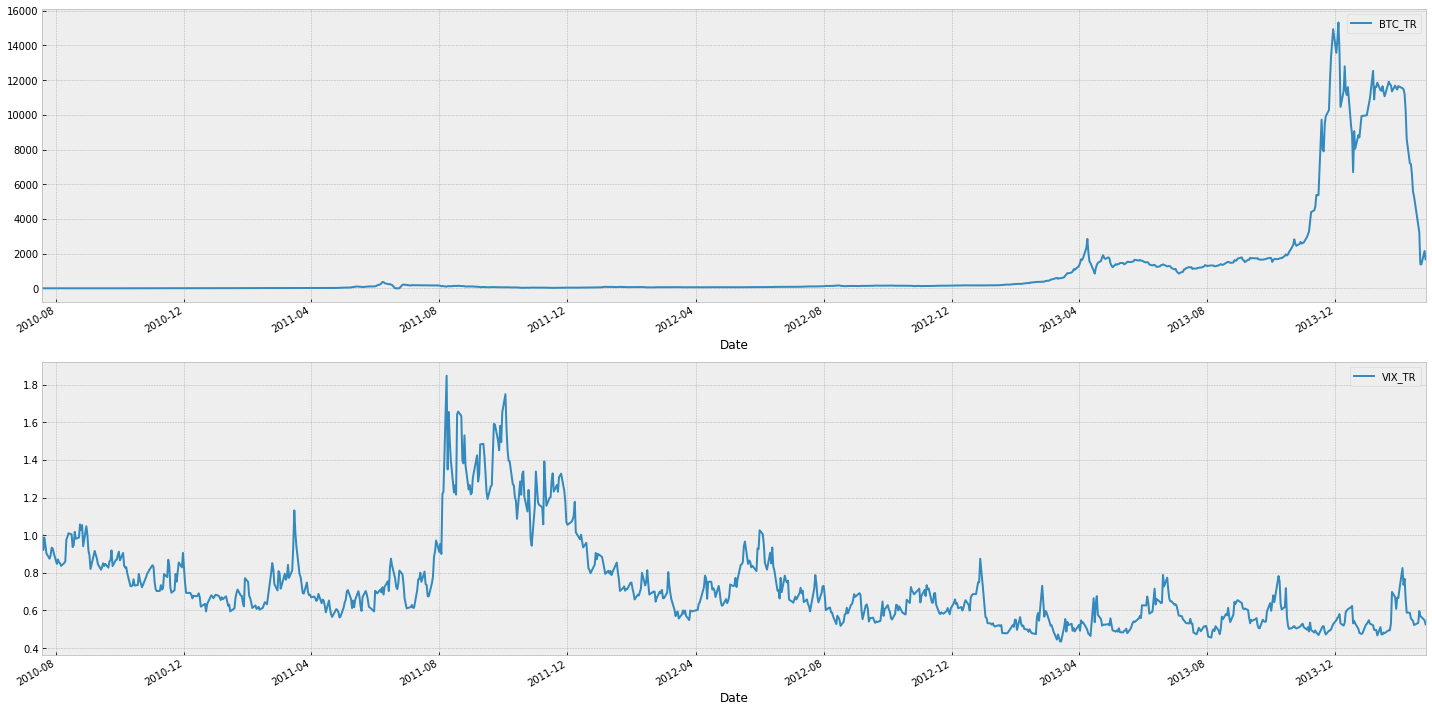

In [79]:
plt.subplot(211)
df['BTC_TR'].plot(figsize=(20,10))
plt.legend()

plt.subplot(212)
df['VIX_TR'].plot(figsize=(20,10))
plt.legend()
plt.tight_layout()

plt.show()

It does not appear that the performance of Bitcoin correlates with the performance of the Volatility Index and thus BTC prices do not appear to be affected by volatility in the equities market.